# Machine configuration example
This notebook describes the process of creating a machine configuration file for
use by FreeGSNKE.

A machine description in FreeGSNE is comprised of active coils
that can have their voltage modulated and act as controls for the plasma shape,
passive structures such as the tokamak wall and coil cans, and non-conducting
surfaces used to define the limit of the plasma.

In the following, we build up each of these elements into the structure required
by FreeGSNKE and save them for later use.

In [1]:
import numpy as np
import pickle

## Active coils
Here we define the characteristics and locations of the *active coils* of our
tokamak. The active coils are those involved with shaping the magnetic field
in the device to confine the plasma and control its shape.

First, define the resistivity of the active coils.

In [2]:
eta_copper = 1.55e-8  # Resistivity in Ohm*m

Now write down the geometry of the coils. The below variables define the
locations of 5 coils: `P1_lower`, `P1_upper`, `P2_lower`, `P2_upper` and `Pz`.
Each coil has 2 windings.

We've also made a shortcut and assumed that `P1_lower` and `P1_upper` have the
same radial position and are equally distanced from the midplane in the vertical
direction. The same applies to `P2_lower` and `P2_upper`.

In [3]:
# P1_lower and P1_upper windings radial positions
P1_r = [0.75, 0.77]

# P1_upper windings vertical positions
P1_upper_z = [1.1, 1.12]

# P1_lower and P1_upper width and height
P1_dr = 0.02
P1_dz = 0.02

# As above, but for the P2_lower and P2_upper coils
P2_r = [1.75, 1.77]
P2_upper_z = [0.6, 0.62]
P2_dr = 0.02
P2_dz = 0.02

# Finally, the Pz coil
Pz_r = [1.75, 1.75]
Pz_z = [0.0, 0.0]
Pz_dr = 0.02
Pz_dz = 0.02

Next, we populate a dictionary with these values. The dictionary (here called
`active_coils_dict`) has a very particular format. Each entry to the dictionary
should be another dictionary describing a coil. This dictionary can take one of
two forms:  
1. One with the keys described below, or
2. One with labels corresponding to multiple coils.

This format allows for standalone coils or groups of coils to be defined. We
first demonstrate the standalone coil `Pz`, then show how `P1_upper` and
`P1_lower` can be grouped, and again for `P2_upper` and `P2_lower`.

The keys for the coil dictionaries are:
- `R`: list of radial positions of windings
- `Z`: list of vertical positions of windings
- `dR`: width
- `dZ`: height
- `resistivity`: resistivity in Ohm*m
- `polarity`: circuit wiring
- `multiplier`: current multiplier (only used for solenoid, see later)

First instantiate the dictionary so we can populate it incrementally

In [4]:
active_coils_dict = {}

Let's  define the standalone Pz coil first.

In [5]:
active_coils_dict["Pz"] = {
    "R": Pz_r,
    "Z": Pz_z,
    "dR": Pz_dr,
    "dZ": Pz_dz,
    "resistivity": eta_copper,
    "polarity": 1,
}

Now let's define the `P1_upper` and `P1_lower` coils.

In [6]:
# The P1 coil group is instantiated as a dictionary
active_coils_dict["P1"] = {}

# Populate with the P1_upper coil information
active_coils_dict["P1"]["upper"] = {
    "R": P1_r,
    "Z": P1_upper_z,
    "dR": P1_dr,
    "dZ": P1_dz,
    "resistivity": eta_copper,
    "polarity": 1,
}

# Populate with the P1_lower coil information
active_coils_dict["P1"]["lower"] = {
    "R": P1_r,
    "Z": [-1*z for z in P1_upper_z],
    "dR": P1_dr,
    "dZ": P1_dz,
    "resistivity": eta_copper,
    "polarity": 1,
}

We follow the same procedure for `P2_upper` and `P2_lower`.

In [7]:
active_coils_dict["P2"] = {}
active_coils_dict["P2"]["upper"] = {
    "R": P2_r,
    "Z": P2_upper_z,
    "dR": P2_dr,
    "dZ": P2_dz,
    "resistivity": eta_copper,
    "polarity": 1,
    "multiplier": 1
}
active_coils_dict["P2"]["lower"] = {
    "R": P2_r,
    "Z": [-1*z for z in P2_upper_z],
    "dR": P2_dr,
    "dZ": P2_dz,
    "resistivity": eta_copper,
    "polarity": 1,
    "multiplier": 1
}

Lastly for the active coils, we need to define a solenoid.

In [8]:
active_coils_dict["Solenoid"] = {
    "R": [0.19475]*150,
    "Z": list(np.linspace(-0.8, 0.8, 150)),
    "dR": 0.012,
    "dZ": 0.018,
    "polarity": 1,
    "resistivity": eta_copper,
    "multiplier": 1
}

Now we can save the active coils dictionary for later use by FreeGSNKE.

In [9]:
with open("active_coils.pickle", "wb") as f:
    pickle.dump(active_coils_dict, f)

## Passive structures
*Passive structures* in FreeGSNKE are those that conduct and will therefore
alter the magnetic field in the device, but don't have their voltage actively
modulated. These can include support structures, walls, coil cans, etc.

FreeGSNKE defines the passive structures as a list of dictionaries defining a
group rectangles, each with the following characteristics:
- `R`: Centre in the radial coordinate.
- `Z`: Centre in the vertical coordinate.
- `dR`: Width.
- `dZ`: Height.
- `resistivity`: resistivity.

In this example, we define the vessel wall as four rectangles. The list is named
`passive_coils` to emphasise that the passive structures are modelled as coils
under the hood.

In [10]:
resistivity_wall = 5.5e-7

passive_coils = []

passive_coils.append({
    "R": 0.3,
    "Z": 0,
    "dR": 0.05,
    "dZ": 2,
    "resistivity": resistivity_wall
})

passive_coils.append({
    "R": 0.975,
    "Z": 1,
    "dR": 1.35,
    "dZ": 0.05,
    "resistivity": resistivity_wall
})

passive_coils.append({
    "R": 1.65,
    "Z": 0,
    "dR": 0.05,
    "dZ": 2,
    "resistivity": resistivity_wall
})

passive_coils.append({
    "R": 0.975,
    "Z": -1,
    "dR": 1.35,
    "dZ": 0.05,
    "resistivity": resistivity_wall
})

Save the passive structures to a pickle.

In [11]:
with open("passive_coils.pickle", "wb") as f:
    pickle.dump(passive_coils, f)

## The limiter
A *limiter* in FreeGSNKE is a software boundary that is used in various
routines. To define a limiter, simply specify points along its boundary.
FreeGSNKE will connect these points to identify the region where the plasma is
allowed to be. 

For diverted plasmas, the limiter has no effect on the equilibrium or their 
evolutions. For limiter plasmas, the last closed flux surface is tangent to 
the limiter boundary defined above.
FreeGSNKE will force the last closed flux surface to lie entirely inside
the region allowed by the limiter. In other words, outside the limiter, 
the constraint $J=0$ is enforced. 

The format of the limiter coordinates for FreeGSNKE is a simple list of 
dictionaries with `R` and `Z` coordinates.

In [12]:
r_limiter = [0.325,  0.325, 1.625, 1.625 ]
z_limiter = [-0.975, 0.975, 0.975, -0.975]

limiter = []
for r, z in zip(r_limiter, z_limiter):
    limiter.append({"R": r, "Z": z})

Save as a pickle file for FreeGSNKE to access later.

In [13]:
with open ("limiter.pickle", "wb") as f:
    pickle.dump(limiter, f)

## The wall
A *wall* in FreeGSNKE is very similar to a limiter. However, there is no $J=0$
constraint enforced outside the wall. The wall is used in plotting routines and
can be used to calculate useful quantities like divertor strike point location.

In general, a wall and limiter in FreeGSNKE can be defined to be different
contours. For example, a tokamak with a divertor would have the wall following
the contour of the divertor, while the limiter might cut across the divertor
entrance. In our example, the wall and limiter are the same.

In [14]:
wall = limiter

with open("wall.pickle", "wb") as f:
    pickle.dump(wall, f)

## Magnetic Probes 

There are a variety of magnetic probes in the machine that measure various components of the magnetic field and or flux function. The description of these is contained in a dictionary we'll call `magnetic_probes` which has the probe type as a key and then a list of smaller dictionaries for each individual probe. Currently the *flux loops* and *pickup coils* are implemented but there are other probe types that exist in MAST_U. Each probe type has different properties - all will have a name and position, and some have orientation information too.

- The flux loops dictionaries contain the `name` and the `position`  which is a 2d array with $R$ and $Z$ coordinates. 
- The pickup coils dictionaries similarly contains the `name` and `position` which is now a 3d array of coordinates $(R,\phi,Z)$. there is also an `orientation` key with a string description of the orientation (parallel, toroidal, normal), and an `orientation_vector` which is also a 3d array.


For example, taking the first two probes of each type we would have 

In [ ]:
# create list of flux loop dictionaries
flux_loops = []
flux_loops.append({'name': fl_nu_01, 'position': array([0.901 , 1.3582], dtype=float32)})
flux_loops.append({'name': fl_nu_02, 'position':array([0.9544   , 1.3041999], dtype=float32)})

# create list of pickup coil dictionaries
pickup_coils = []
pickup_coils.append({'name': 'b_c1_p01', 'position': array([2.76900e-01, 3.00000e+02, 1.26203e+00], dtype=float32), 'orientation': 'PARALLEL', 'orientation_vector': array([0., 0., 1.], dtype=float32)}
)
pickup_coils.append({'name': 'b_c1_t02', 'position': array([2.7689108e-01, 2.9999680e+02, 1.2245095e+00], dtype=float32), 'orientation': 'TOROIDAL', 'orientation_vector': array([0., 1., 0.], dtype=float32)}
)

# create magnetic probes dictionary
magnetic_probes = {'flux_loops': flux_loops, 'pickups': pickup_coils}

# save as pickle file
with open("magnetic_probes.pickle", "wb") as f:
    pickle.dump(magnetic_probes, f)

## Visualising the machine
Now we'll plot the components of the machine to visualise its configuration.

Note that the equilibrium class has convenient plotting methods, but we don't
use those here as we aren't concerned with creating an equilibrium.

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

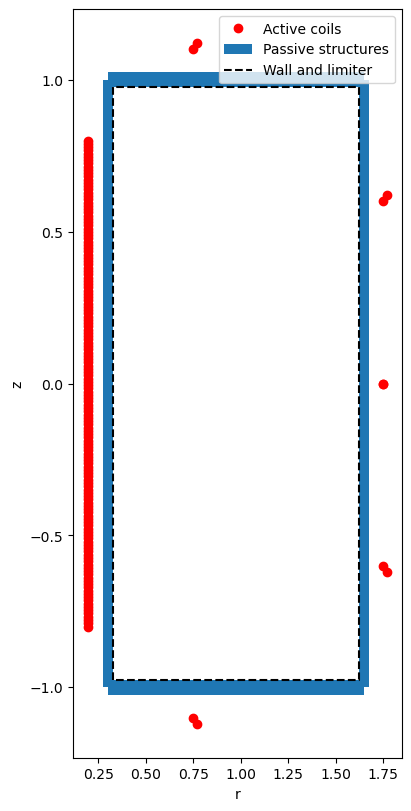

In [16]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 8))
ax.set_xlabel('r')
ax.set_ylabel('z')


# Active coils
def plot_active_coil(ax, coil, label=None):
    ax.plot(coil["R"], coil["Z"], c="red", marker="o", ls="", label=label)


for coil in ["P1", "P2"]:
    plot_active_coil(ax, active_coils_dict[coil]["upper"])
    plot_active_coil(ax, active_coils_dict[coil]["lower"])
plot_active_coil(ax, active_coils_dict["Pz"])
plot_active_coil(ax, active_coils_dict["Solenoid"], label='Active coils')


# Passive structure
for i, p in enumerate(passive_coils):
    rect = patches.Rectangle(
        (p["R"]-0.5*p["dR"], p["Z"]-0.5*p["dZ"]),
        p["dR"],
        p["dZ"],
        label='Passive structures' if i==0 else None
    )
    ax.add_patch(rect)

# Limiter
ax.plot(
    [l["R"] for l in limiter] + [limiter[0]["R"]],
    [l["Z"] for l in limiter] + [limiter[0]["Z"]],
    c='k',
    ls='--',
    label='Wall and limiter'
)

ax.legend(loc='upper right')

## Optional initialization equilibrium

It can be convenient to use a reference equilibrium that is representative for the machine that is being used. This may reduce computation times when seeking new Grad-Shafranov solutions.
It is ipossible to provide such equilibrium as part of the machine description. If this is done, the provided information (values for a set of coil currents and for the plasma flux function) will be used when initializing new equilibria.

This information should be provided in the form of a dictionary. The code below illustrates the structure of such dictionary. 
In this case, we are assuming the equilibrium being saved is relevant to MAST-U.
Here `eq` is the reference equilibrium itself, which is assumed to be a solution of the GS equation. Please see Example_1 for more details on equilibrium objects and how to make sure they are GS solutions. 

```python
dictionary = {}
dictionary['coil_currents'] = eq.tokamak.getCurrents()
dictionary['plasma_psi'] = eq.plasma_psi

# save equilibrium info to file
import pickle
with open(
    '../machine_configs/MAST-U/simple_initilization_equilibrium.pickle', 'wb') as f:
    pickle.dump(obj=dictionary, file=f)
```